In [5]:
from SinglePushout2 import Graph, Morphism, single_pushout
import networkx as nx

In [6]:
# Example rewrite rule: L -> R where L has a single unmarked edge, and R replaces it with two edges
L = Graph(nodes={1, 2}, edges={(1, 2)})
R = Graph(nodes={1, 2, 3}, edges={(1, 3), (3, 2)})

# Define the morphism from L to R
morphism_LR = Morphism(
    node_mapping={1: 1, 2: 2},
    edge_mapping={(1, 2): (1, 3)}
)

# Define the host graph G and occurrence of L in G
G = Graph(nodes={1, 2, 4}, edges={(1, 2), (2, 4)}, marked_nodes={4})
morphism_LG = Morphism(
    node_mapping={1: 1, 2: 2},
    edge_mapping={(1, 2): (1, 2)}
)

# Apply the single pushout to get the rewritten graph H
H = single_pushout(G, (L, R, morphism_LR), morphism_LG)
print(H)

Graph(nodes={1, 2, 3, 4}, edges={(3, 2), (1, 3), (2, 4)}, marked_nodes={4}, marked_edges=set())


In [16]:
G = nx.DiGraph()
G.add_nodes_from(H.nodes)
G.add_edges_from(H.edges)
marked_edges = H.marked_edges
marked_nodes = H.marked_nodes

<class 'networkx.classes.digraph.DiGraph'>
<class 'dict'>
<class 'list'>
<class 'list'>


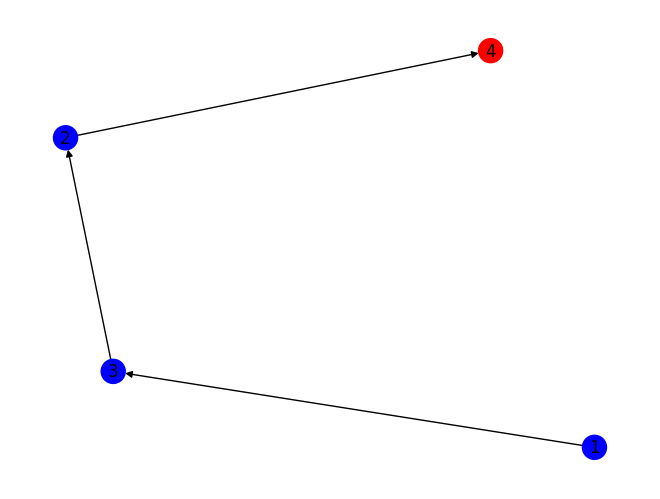

In [17]:
# Prepare node colors: red for marked nodes, blue for unmarked
node_colors = ["red" if node in marked_nodes else "blue" for node in G.nodes]

# Prepare edge colors: dashed red for marked edges, black for unmarked
edge_colors = ["red" if edge in marked_edges else "black" for edge in G.edges]

# Plot the graph with networkx and matplotlib
pos = nx.spring_layout(G)  # Layout for positioning nodes
print(type(G))
print(type(pos))
print(type(node_colors))
print(type(edge_colors))

nx.draw(G, pos, with_labels=True, node_color=node_colors, edge_color=edge_colors)